In [1]:
#import pandas reader
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
df_tesla=pdr.get_data_yahoo('TSLA')

In [4]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-09,860.559998,832.010010,839.479980,858.969971,19728000.0,858.969971
2022-03-10,854.450012,810.359985,851.450012,838.299988,19549500.0,838.299988
2022-03-11,843.799988,793.770020,840.200012,795.349976,22272800.0,795.349976
2022-03-14,800.700012,756.039978,780.609985,766.369995,23538500.0,766.369995
2022-03-14,800.699890,756.049988,780.609985,766.369995,23717421.0,766.369995


In [5]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-03-16 to 2022-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


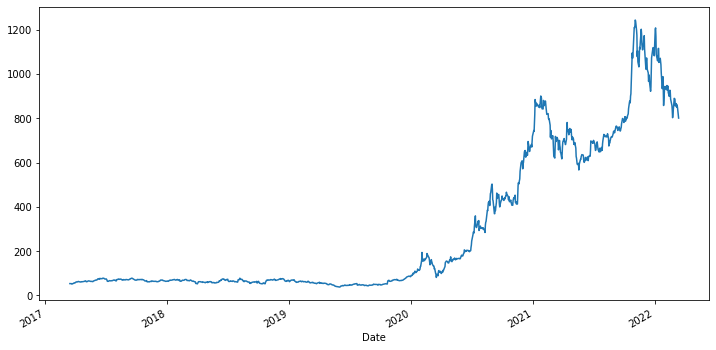

In [6]:
df_tesla['High'].plot(figsize=(12,6))

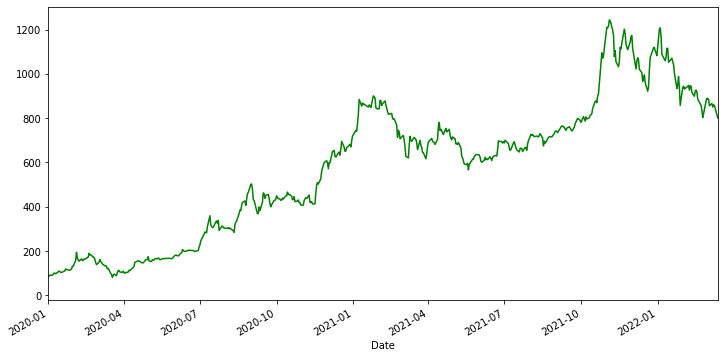

In [7]:
#xlimit and ylimit to plot certain time with color
df_tesla['High'].plot(xlim=['2020-01-01','2022-03-14'],figsize=(12,6),color='g')

In [8]:
#loc function is used to select specific row and columns with row_columns_labeling
index=df_tesla.loc['2020-01-01':'2022-03-14'].index
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-07',
               '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
               '2022-03-14', '2022-03-14'],
              dtype='datetime64[ns]', name='Date', length=555, freq=None)

In [9]:
share_open=df_tesla.loc['2020-01-01':'2022-03-14','Open']
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2022-03-09    839.479980
2022-03-10    851.450012
2022-03-11    840.200012
2022-03-14    780.609985
2022-03-14    780.609985
Name: Open, Length: 555, dtype: float64

In [10]:
import matplotlib.pyplot as plt


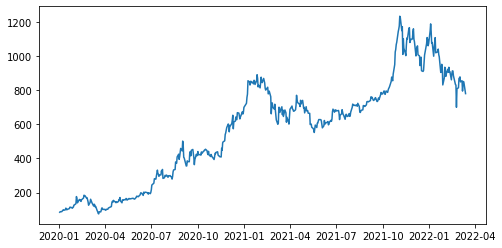

In [11]:
figure,axis=plt.subplots(figsize=(8,4))
#this helps in overlaping of date
figure.autofmt_xdate
axis.plot(index,share_open)

In [12]:
#datetime Index

In [13]:
df_tesla=df_tesla.reset_index()

In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [15]:
#again to set back date to index
df_tesla=df_tesla.set_index('Date',drop=True)


In [16]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-16,53.150002,51.812000,52.480000,52.410000,35661000.0,52.410000
2017-03-17,53.066002,52.240002,52.799999,52.299999,32487500.0,52.299999
2017-03-20,52.910000,51.764000,52.119999,52.383999,18071500.0,52.383999
2017-03-21,52.959999,50.048000,52.566002,50.136002,34543000.0,50.136002
2017-03-22,51.014000,50.102001,50.312000,51.001999,20296500.0,51.001999


In [17]:
#datetime use case
date=datetime(2022,3,15)

In [18]:
date.year

2022

In [19]:
date.day

15

In [20]:
date.month

3

In [21]:
#time resampling


In [22]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-16,53.150002,51.812000,52.480000,52.410000,35661000.0,52.410000
2017-03-17,53.066002,52.240002,52.799999,52.299999,32487500.0,52.299999
2017-03-20,52.910000,51.764000,52.119999,52.383999,18071500.0,52.383999
2017-03-21,52.959999,50.048000,52.566002,50.136002,34543000.0,50.136002
2017-03-22,51.014000,50.102001,50.312000,51.001999,20296500.0,51.001999


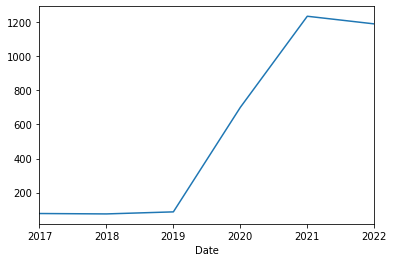

In [23]:
#rule is noting but certain set of instruction
#rule A means year end frequency
df_tesla.resample(rule='A').max()['Open'].plot()

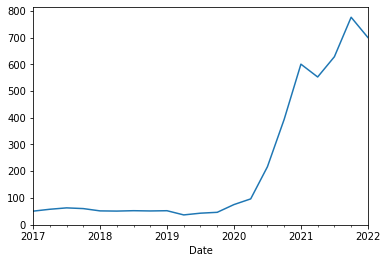

In [24]:
#quaterly start frequency
df_tesla.resample(rule='Q').min()['Open'].plot()

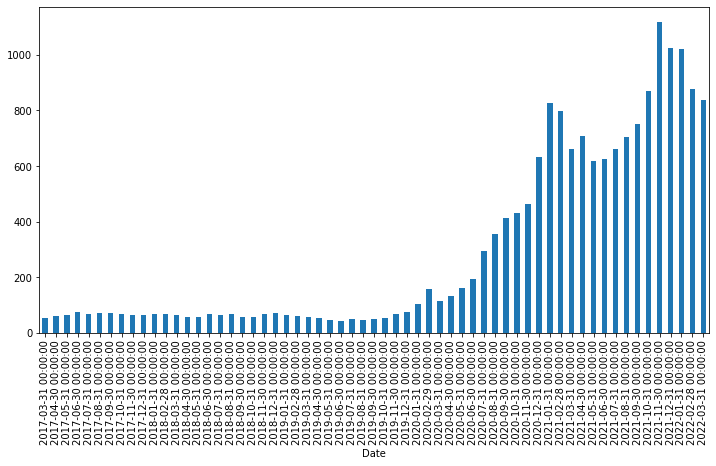

In [25]:
#plotting
df_tesla['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(12,6))

In [26]:
#rolling it helps in smoothning the curve
#rolling of 10 means it takes first 10 value mean and displace in 11 value and next 10 in 12th value and goes on..
df_tesla['open 30 days rolling']=df_tesla['Open'].rolling(30).mean() 

In [27]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,open 30 days rolling
Date,,,,,,,
2017-03-16,53.150002,51.812000,52.480000,52.410000,35661000.0,52.410000,NaN
2017-03-17,53.066002,52.240002,52.799999,52.299999,32487500.0,52.299999,NaN
2017-03-20,52.910000,51.764000,52.119999,52.383999,18071500.0,52.383999,NaN
2017-03-21,52.959999,50.048000,52.566002,50.136002,34543000.0,50.136002,NaN
2017-03-22,51.014000,50.102001,50.312000,51.001999,20296500.0,51.001999,NaN


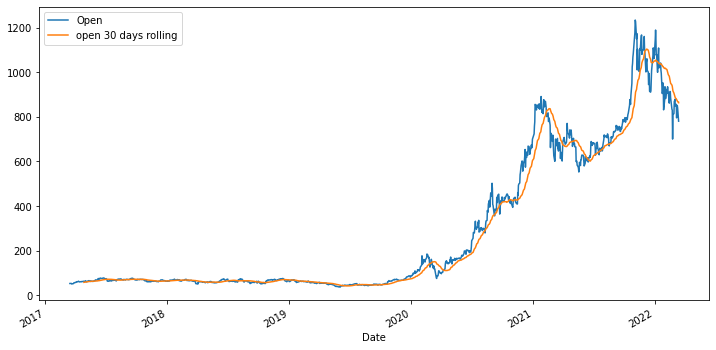

In [28]:
df_tesla[['Open','open 30 days rolling']].plot(figsize=(12,6))

#Assignment
1:-Read microsoft data set for pandas data reader <br>
2:-get the max price of the share for 2017-2022<br>
3:-which is the date of the highest price of the stock<br>
4:-which is the date of the lowest price of the stock